In [1]:
import gzip
f = gzip.open('../data/mnist/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 5

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

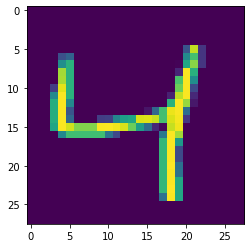

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
image = np.asarray(data[2]).squeeze()
plt.imshow(image)
plt.show()

In [81]:
image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [3]:
import tests

In [4]:
x = tests.load_frey()

In [5]:
x.shape

(1965, 28, 20)

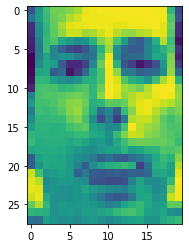

In [6]:
plt.imshow(x[0])

In [7]:
test_case_name='frey1'

In [8]:
test_case = tests.test_cases[test_case_name]

In [10]:
input_shape = test_case['input_shape']
x = test_case['dataset_loader'](input_shape, test_case.get('options'))

In [12]:
dim_z_hidden, dim_z, dim_x_hidden = test_case['model_dims']
model = test_case['model_class'](
    dim_z_hidden=dim_z_hidden,
    dim_z=dim_z,
    input_shape=x.shape[1:],
    dim_x_hidden=dim_x_hidden)

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

In [67]:
model.encoder = keras.models.load_model('frey1_encoder.h5')

In [68]:
model.decoder = keras.models.load_model('frey1_decoder.h5')

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import copy
import model_normal_simple as mns
import model_vae_bayes as mvb
import elbo_calculator as ec
import train
import argparse
import os
from scipy.io import loadmat
import tests
%autoreload 2

In [70]:
loss_func = ec.elbo_calculator().get_loss_func()

In [71]:
loss = loss_func(model, x, None, test_case.get('options'))

In [72]:
loss

<tf.Tensor: id=1183992, shape=(), dtype=float32, numpy=-1196.4244>

In [73]:
z = np.random.normal(0,1,(1,dim_z))

In [74]:
z.shape

(1, 10)

In [75]:
mu_x, log_sigma_x = model.decoder(z)

In [76]:
mu_x.shape

TensorShape([1, 560])

In [77]:
log_sigma_x.shape

TensorShape([1, 560])

In [42]:
xs = np.random.normal(mu_x.numpy(), np.exp(log_sigma_x.numpy()) )

In [43]:
xs.shape

(1, 560)

In [78]:
img = np.reshape(mu_x.numpy(), (28,20))

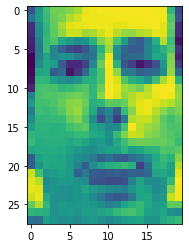

In [79]:
plt.imshow(x[0])

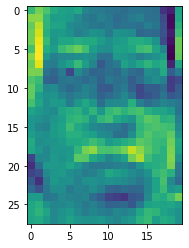

In [80]:
plt.imshow(img)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

epoch 100: loss = 477.1623
epoch 200: loss = 671.7811
epoch 300: loss = 610.0877
epoch 400: loss = 669.4385
epoch 500: loss = 603.98596
epoch 600: loss = 639.6938
epoch 700: loss = 674.2326
epoch 800: loss = 776.24066
epoch 900: loss = 713.8891
epoch 1000: loss = 779.45154

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are po

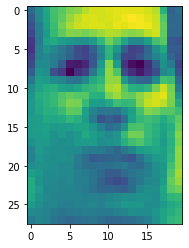

epoch 1100: loss = 753.6687
epoch 1200: loss = 629.3155
epoch 1300: loss = 736.9192
epoch 1400: loss = 727.735
epoch 1500: loss = 673.1478
epoch 1600: loss = 739.63855
epoch 1700: loss = 740.75214
epoch 1800: loss = 689.28546
epoch 1900: loss = 672.4266
epoch 2000: loss = 769.15466


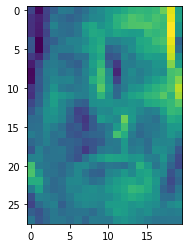

epoch 2100: loss = 708.049
epoch 2200: loss = 697.46405
epoch 2300: loss = 765.64594
epoch 2400: loss = 730.3547
epoch 2500: loss = 758.0513
epoch 2600: loss = 800.99146
epoch 2700: loss = 730.95935
epoch 2800: loss = 650.25916
epoch 2900: loss = 813.48236
epoch 3000: loss = 726.1971


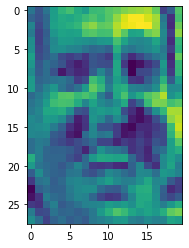

epoch 3100: loss = 777.0679
epoch 3200: loss = 851.7057
epoch 3300: loss = 730.9752
epoch 3400: loss = 700.7371
epoch 3500: loss = 721.3529
epoch 3600: loss = 652.4382
epoch 3700: loss = 789.917
epoch 3800: loss = 772.9623
epoch 3900: loss = 790.8795
epoch 4000: loss = 776.64734


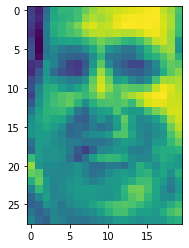

epoch 4100: loss = 734.7348
epoch 4200: loss = 695.73883
epoch 4300: loss = 654.98865
epoch 4400: loss = 691.62
epoch 4500: loss = 786.6692
epoch 4600: loss = 740.1083
epoch 4700: loss = 767.9621
epoch 4800: loss = 719.46844
epoch 4900: loss = 659.7936
epoch 5000: loss = 797.6482


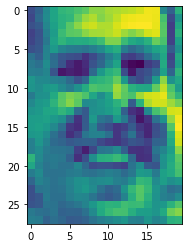

epoch 5100: loss = 747.59106
epoch 5200: loss = 773.8934
epoch 5300: loss = 633.584
epoch 5400: loss = 773.4138
epoch 5500: loss = 783.57336
epoch 5600: loss = 851.11536
epoch 5700: loss = 859.89404
epoch 5800: loss = 763.33765
epoch 5900: loss = 811.9419
epoch 6000: loss = 853.14484


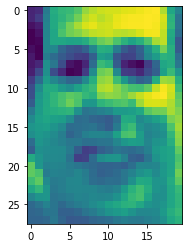

epoch 6100: loss = 807.93353
epoch 6200: loss = 810.1864
epoch 6300: loss = 711.8775
epoch 6400: loss = 840.2838
epoch 6500: loss = 700.10315
epoch 6600: loss = 775.3667
epoch 6700: loss = 740.3253
epoch 6800: loss = 693.71063
epoch 6900: loss = 821.0034
epoch 7000: loss = 830.7454


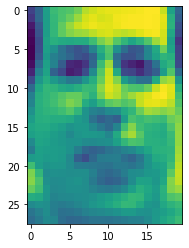

epoch 7100: loss = 919.68274
epoch 7200: loss = 687.39685
epoch 7300: loss = 838.20496
epoch 7400: loss = 793.36176
epoch 7500: loss = 805.4015
epoch 7600: loss = 862.4222
epoch 7700: loss = 683.5211
epoch 7800: loss = 789.69464
epoch 7900: loss = 832.60565
epoch 8000: loss = 817.3435


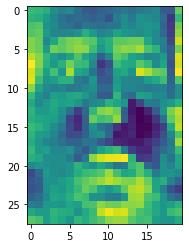

epoch 8100: loss = 841.06287
epoch 8200: loss = 780.9618
epoch 8300: loss = 874.2103
epoch 8400: loss = 856.7184
epoch 8500: loss = 775.4792
epoch 8600: loss = 812.8147
epoch 8700: loss = 838.62463
epoch 8800: loss = 886.93097
epoch 8900: loss = 743.49725
epoch 9000: loss = 719.28864


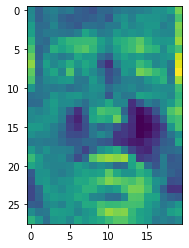

epoch 9100: loss = 810.03625
epoch 9200: loss = 916.5282
epoch 9300: loss = 793.85626
epoch 9400: loss = 815.93536
epoch 9500: loss = 692.2221
epoch 9600: loss = 864.5448
epoch 9700: loss = 924.8284
epoch 9800: loss = 887.96204
epoch 9900: loss = 844.6287
epoch 10000: loss = 709.57025


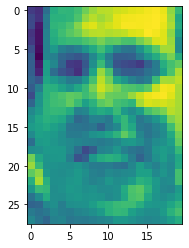

epoch 10100: loss = 702.0172
epoch 10200: loss = 880.30206
epoch 10300: loss = 892.1799
epoch 10400: loss = 791.14526
epoch 10500: loss = 774.20557
epoch 10600: loss = 791.6773
epoch 10700: loss = 838.12823
epoch 10800: loss = 790.18256
epoch 10900: loss = 708.73883
epoch 11000: loss = 836.0963


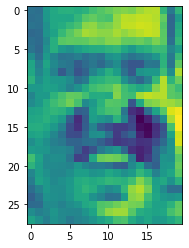

epoch 11100: loss = 816.4764
epoch 11200: loss = 844.95184
epoch 11300: loss = 697.55493
epoch 11400: loss = 825.80615
epoch 11500: loss = 852.0794
epoch 11600: loss = 777.1837
epoch 11700: loss = 737.73755
epoch 11800: loss = 790.5362
epoch 11900: loss = 775.6477
epoch 12000: loss = 756.21936


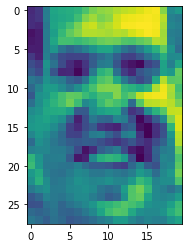

epoch 12100: loss = 664.7036
epoch 12200: loss = 891.0171
epoch 12300: loss = 847.3742
epoch 12400: loss = 833.74384
epoch 12500: loss = 770.6018
epoch 12600: loss = 725.67346
epoch 12700: loss = 835.40967
epoch 12800: loss = 714.32776
epoch 12900: loss = 818.393
epoch 13000: loss = 736.38074


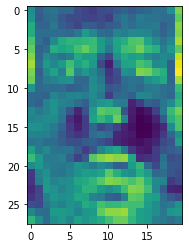

epoch 13100: loss = 755.4006
epoch 13200: loss = 794.491
epoch 13300: loss = 871.01776
epoch 13400: loss = 825.786
epoch 13500: loss = 823.7332
epoch 13600: loss = 829.4147
epoch 13700: loss = 767.1064
epoch 13800: loss = 781.02234
epoch 13900: loss = 675.4008
epoch 14000: loss = 724.8362


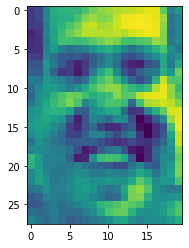

epoch 14100: loss = 844.15314
epoch 14200: loss = 825.6242
epoch 14300: loss = 792.1638
epoch 14400: loss = 717.16205
epoch 14500: loss = 844.53564
epoch 14600: loss = 833.1376
epoch 14700: loss = 746.87726
epoch 14800: loss = 832.42957
epoch 14900: loss = 775.627
epoch 15000: loss = 809.702


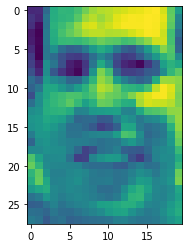

epoch 15100: loss = 845.22156
epoch 15200: loss = 868.88995
epoch 15300: loss = 806.79425
epoch 15400: loss = 744.0362
epoch 15500: loss = 704.9145
epoch 15600: loss = 753.2785
epoch 15700: loss = 720.5303
epoch 15800: loss = 760.4058
epoch 15900: loss = 830.9342
epoch 16000: loss = 814.3485


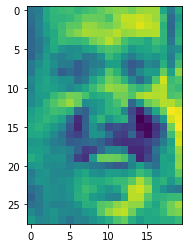

epoch 16100: loss = 849.0057
epoch 16200: loss = 802.6963
epoch 16300: loss = 762.1915
epoch 16400: loss = 792.92993
epoch 16500: loss = 883.3205
epoch 16600: loss = 844.08514
epoch 16700: loss = 866.9577
epoch 16800: loss = 753.68616
epoch 16900: loss = 721.8445
epoch 17000: loss = 869.867


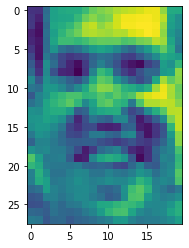

epoch 17100: loss = 805.9299
epoch 17200: loss = 799.5784
epoch 17300: loss = 722.29236
epoch 17400: loss = 827.31213
epoch 17500: loss = 945.36707
epoch 17600: loss = 723.96423
epoch 17700: loss = 832.6175
epoch 17800: loss = 746.086
epoch 17900: loss = 701.3721
epoch 18000: loss = 901.04285


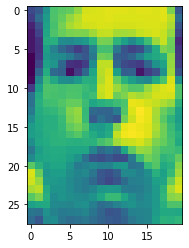

epoch 18100: loss = 762.6037
epoch 18200: loss = 769.92566
epoch 18300: loss = 921.8475
epoch 18400: loss = 799.03345
epoch 18500: loss = 815.83734
epoch 18600: loss = 816.2462
epoch 18700: loss = 780.2708
epoch 18800: loss = 930.8628
epoch 18900: loss = 794.5367
epoch 19000: loss = 860.04816


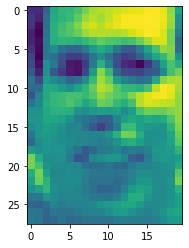

epoch 19100: loss = 803.7982
epoch 19200: loss = 810.0553
epoch 19300: loss = 748.0785
epoch 19400: loss = 808.0226
epoch 19500: loss = 742.9296
epoch 19600: loss = 879.49854
epoch 19700: loss = 823.9598
epoch 19800: loss = 828.0251
epoch 19900: loss = 845.9053
epoch 20000: loss = 822.48206


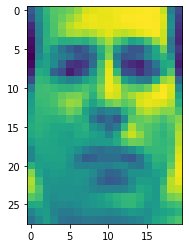

epoch 20100: loss = 884.38007
epoch 20200: loss = 810.97687
epoch 20300: loss = 964.5973
epoch 20400: loss = 902.5571
epoch 20500: loss = 759.3467
epoch 20600: loss = 657.8489
epoch 20700: loss = 606.292
epoch 20800: loss = 850.2002
epoch 20900: loss = 768.1586
epoch 21000: loss = 773.6703


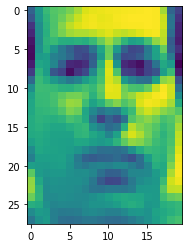

epoch 21100: loss = 922.0164
epoch 21200: loss = 671.0966
epoch 21300: loss = 810.3181
epoch 21400: loss = 801.6295
epoch 21500: loss = 727.2351
epoch 21600: loss = 759.6891
epoch 21700: loss = 829.575
epoch 21800: loss = 787.6405
epoch 21900: loss = 857.6753
epoch 22000: loss = 775.01


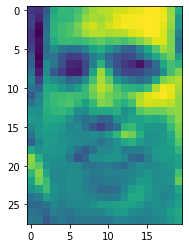

epoch 22100: loss = 753.37317
epoch 22200: loss = 762.88245
epoch 22300: loss = 879.63916
epoch 22400: loss = 920.76514
epoch 22500: loss = 710.7245
epoch 22600: loss = 841.2663
epoch 22700: loss = 707.69574
epoch 22800: loss = 763.51056
epoch 22900: loss = 782.47473
epoch 23000: loss = 804.90564


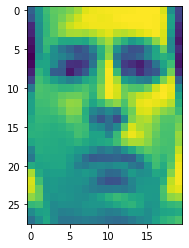

epoch 23100: loss = 733.75867
epoch 23200: loss = 723.61426
epoch 23300: loss = 867.3001
epoch 23400: loss = 865.6166
epoch 23500: loss = 786.37714
epoch 23600: loss = 753.6196
epoch 23700: loss = 697.52814
epoch 23800: loss = 661.224
epoch 23900: loss = 705.3207
epoch 24000: loss = 854.4652


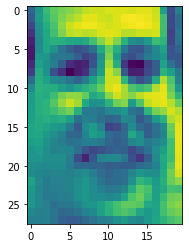

epoch 24100: loss = 848.9503
epoch 24200: loss = 755.62146
epoch 24300: loss = 885.2824
epoch 24400: loss = 869.2785
epoch 24500: loss = 802.81116
epoch 24600: loss = 778.4185
epoch 24700: loss = 697.9396
epoch 24800: loss = 859.18896
epoch 24900: loss = 792.9716
epoch 25000: loss = 810.2341


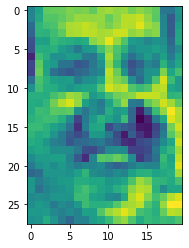

epoch 25100: loss = 960.39954
epoch 25200: loss = 701.8384
epoch 25300: loss = 808.96027
epoch 25400: loss = 804.40564
epoch 25500: loss = 915.69415
epoch 25600: loss = 758.9236
epoch 25700: loss = 843.62976
epoch 25800: loss = 809.9806
epoch 25900: loss = 842.73474
epoch 26000: loss = 897.4468


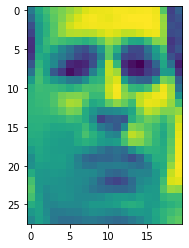

epoch 26100: loss = 788.09607
epoch 26200: loss = 780.7571
epoch 26300: loss = 760.34216
epoch 26400: loss = 805.2947
epoch 26500: loss = 911.7832
epoch 26600: loss = 880.1468
epoch 26700: loss = 782.5531
epoch 26800: loss = 875.82996
epoch 26900: loss = 896.84753
epoch 27000: loss = 863.0695


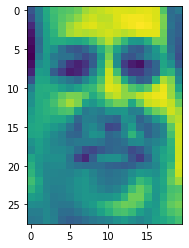

epoch 27100: loss = 821.11707
epoch 27200: loss = 826.0765
epoch 27300: loss = 801.683
epoch 27400: loss = 884.15967
epoch 27500: loss = 885.9788
epoch 27600: loss = 870.61066
epoch 27700: loss = 797.4261
epoch 27800: loss = 859.7664
epoch 27900: loss = 896.7404
epoch 28000: loss = 890.97327


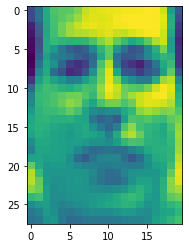

epoch 28100: loss = 936.5708
epoch 28200: loss = 814.86475
epoch 28300: loss = 913.4325
epoch 28400: loss = 793.51025
epoch 28500: loss = 783.2714
epoch 28600: loss = 800.4469
epoch 28700: loss = 875.4666
epoch 28800: loss = 877.8721
epoch 28900: loss = 759.77673
epoch 29000: loss = 797.3543


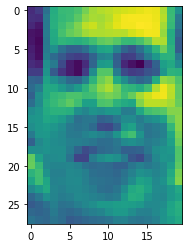

epoch 29100: loss = 974.69434
epoch 29200: loss = 843.15247
epoch 29300: loss = 815.30334
epoch 29400: loss = 758.21875
epoch 29500: loss = 796.02094
epoch 29600: loss = 924.07
epoch 29700: loss = 747.6159
epoch 29800: loss = 943.7186
epoch 29900: loss = 844.3405
epoch 30000: loss = 840.58417


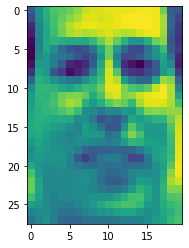

epoch 30100: loss = 785.0286
epoch 30200: loss = 860.27576
epoch 30300: loss = 814.72595
epoch 30400: loss = 904.24347
epoch 30500: loss = 770.5352
epoch 30600: loss = 864.3444
epoch 30700: loss = 963.4463
epoch 30800: loss = 854.361
epoch 30900: loss = 813.7466
epoch 31000: loss = 735.6628


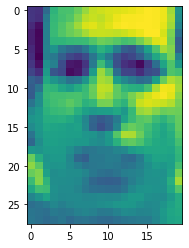

epoch 31100: loss = 726.6765
epoch 31200: loss = 829.7157
epoch 31300: loss = 838.4635
epoch 31400: loss = 868.67706
epoch 31500: loss = 849.2394
epoch 31600: loss = 766.1006
epoch 31700: loss = 822.78156
epoch 31800: loss = 698.4983
epoch 31900: loss = 744.9471
epoch 32000: loss = 789.28906


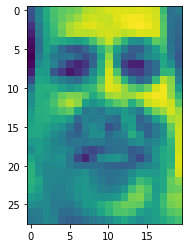

epoch 32100: loss = 994.2507
epoch 32200: loss = 810.51746
epoch 32300: loss = 926.0983
epoch 32400: loss = 907.91034
epoch 32500: loss = 888.6029
epoch 32600: loss = 792.0256
epoch 32700: loss = 836.97656
epoch 32800: loss = 862.5387
epoch 32900: loss = 990.4927
epoch 33000: loss = 844.991


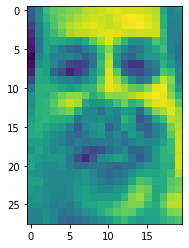

epoch 33100: loss = 833.91534
epoch 33200: loss = 807.77185
epoch 33300: loss = 789.63776
epoch 33400: loss = 836.8548
epoch 33500: loss = 797.08844
epoch 33600: loss = 876.12646
epoch 33700: loss = 729.9098
epoch 33800: loss = 900.06805
epoch 33900: loss = 904.1421
epoch 34000: loss = 836.46356


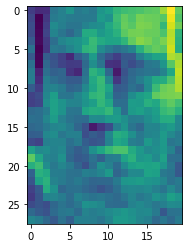

epoch 34100: loss = 787.37384
epoch 34200: loss = 895.7912
epoch 34300: loss = 927.0128
epoch 34400: loss = 913.55505
epoch 34500: loss = 710.08276
epoch 34600: loss = 753.05237
epoch 34700: loss = 787.499
epoch 34800: loss = 785.81793
epoch 34900: loss = 837.089
epoch 35000: loss = 761.39404


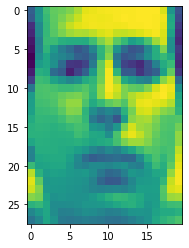

epoch 35100: loss = 884.68097
epoch 35200: loss = 852.95605
epoch 35300: loss = 821.6434
epoch 35400: loss = 853.8219
epoch 35500: loss = 917.6953
epoch 35600: loss = 807.69556
epoch 35700: loss = 944.81506
epoch 35800: loss = 826.88
epoch 35900: loss = 722.7738
epoch 36000: loss = 886.05255


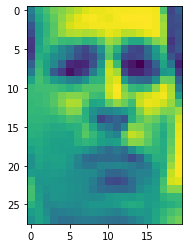

epoch 36100: loss = 925.0965
epoch 36200: loss = 847.8963
epoch 36300: loss = 791.57227
epoch 36400: loss = 772.39355
epoch 36500: loss = 926.6331
epoch 36600: loss = 733.26764
epoch 36700: loss = 843.5544
epoch 36800: loss = 782.96063
epoch 36900: loss = 848.05927
epoch 37000: loss = 781.096


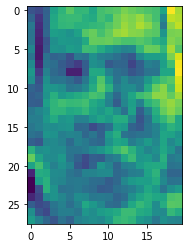

epoch 37100: loss = 947.1782
epoch 37200: loss = 787.7262
epoch 37300: loss = 711.60016
epoch 37400: loss = 819.1193
epoch 37500: loss = 810.71423
epoch 37600: loss = 886.66376
epoch 37700: loss = 833.61414
epoch 37800: loss = 873.33075
epoch 37900: loss = 877.2572
epoch 38000: loss = 774.79504


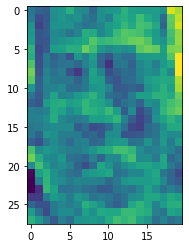

epoch 38100: loss = 849.5327
epoch 38200: loss = 809.0116
epoch 38300: loss = 962.34503
epoch 38400: loss = 904.808
epoch 38500: loss = 890.9208
epoch 38600: loss = 869.7155
epoch 38700: loss = 805.122
epoch 38800: loss = 890.93066
epoch 38900: loss = 987.3229
epoch 39000: loss = 759.82117


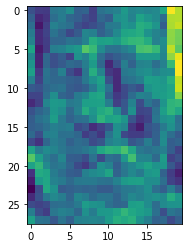

epoch 39100: loss = 870.88885
epoch 39200: loss = 838.2145
epoch 39300: loss = 807.5286
epoch 39400: loss = 927.09
epoch 39500: loss = 778.6199
epoch 39600: loss = 793.46674
epoch 39700: loss = 941.1247
epoch 39800: loss = 779.723
epoch 39900: loss = 716.51764
epoch 40000: loss = 949.1947


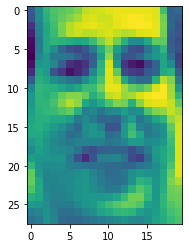

epoch 40100: loss = 772.97754
epoch 40200: loss = 899.21173
epoch 40300: loss = 837.0671
epoch 40400: loss = 774.0082
epoch 40500: loss = 873.60516
epoch 40600: loss = 870.50195
epoch 40700: loss = 788.6886
epoch 40800: loss = 810.6084
epoch 40900: loss = 967.112
epoch 41000: loss = 901.5039


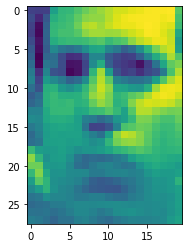

epoch 41100: loss = 827.5602
epoch 41200: loss = 837.1548
epoch 41300: loss = 845.0582
epoch 41400: loss = 724.93823
epoch 41500: loss = 810.4794
epoch 41600: loss = 807.4745
epoch 41700: loss = 892.2
epoch 41800: loss = 816.6112
epoch 41900: loss = 740.8426
epoch 42000: loss = 820.988


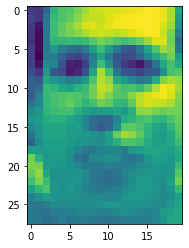

epoch 42100: loss = 847.94324
epoch 42200: loss = 838.79785
epoch 42300: loss = 877.72595
epoch 42400: loss = 798.61743
epoch 42500: loss = 863.7116
epoch 42600: loss = 816.87213
epoch 42700: loss = 897.67773
epoch 42800: loss = 880.06464
epoch 42900: loss = 754.3888
epoch 43000: loss = 860.2502


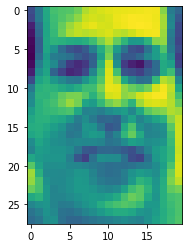

epoch 43100: loss = 855.5425
epoch 43200: loss = 877.4081
epoch 43300: loss = 869.00995
epoch 43400: loss = 807.4833
epoch 43500: loss = 926.3263
epoch 43600: loss = 892.71796
epoch 43700: loss = 865.1366
epoch 43800: loss = 845.85614
epoch 43900: loss = 754.244
epoch 44000: loss = 771.4281


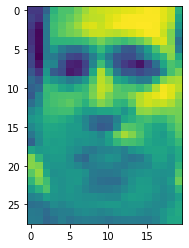

epoch 44100: loss = 979.1998
epoch 44200: loss = 856.6188
epoch 44300: loss = 917.9938
epoch 44400: loss = 764.79504
epoch 44500: loss = 886.99884
epoch 44600: loss = 883.7424
epoch 44700: loss = 788.3756
epoch 44800: loss = 914.3379
epoch 44900: loss = 782.171
epoch 45000: loss = 794.3372


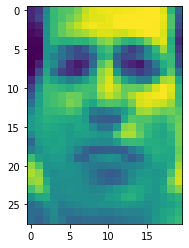

epoch 45100: loss = 904.41864
epoch 45200: loss = 840.83856
epoch 45300: loss = 740.54956
epoch 45400: loss = 958.05664
epoch 45500: loss = 919.42566
epoch 45600: loss = 888.10876
epoch 45700: loss = 862.193
epoch 45800: loss = 893.7616
epoch 45900: loss = 908.04425
epoch 46000: loss = 881.0197


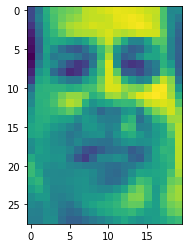

epoch 46100: loss = 795.9582
epoch 46200: loss = 836.17303
epoch 46300: loss = 861.8206
epoch 46400: loss = 866.6305
epoch 46500: loss = 819.3841
epoch 46600: loss = 821.2721
epoch 46700: loss = 842.66565
epoch 46800: loss = 867.69385
epoch 46900: loss = 850.6258
epoch 47000: loss = 880.23615


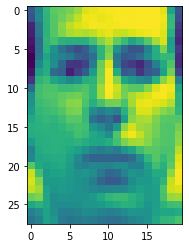

epoch 47100: loss = 879.47107
epoch 47200: loss = 908.04474
epoch 47300: loss = 752.2688
epoch 47400: loss = 872.38513
epoch 47500: loss = 896.61505
epoch 47600: loss = 999.1714
epoch 47700: loss = 842.8296
epoch 47800: loss = 776.5676
epoch 47900: loss = 833.81067
epoch 48000: loss = 953.8918


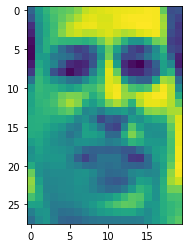

epoch 48100: loss = 1074.7803
epoch 48200: loss = 739.78217
epoch 48300: loss = 901.9645
epoch 48400: loss = 846.46747
epoch 48500: loss = 828.2067
epoch 48600: loss = 781.6228
epoch 48700: loss = 804.5609
epoch 48800: loss = 836.4299
epoch 48900: loss = 1001.7669
epoch 49000: loss = 940.5075


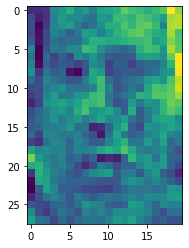

epoch 49100: loss = 962.7565
epoch 49200: loss = 825.73425
epoch 49300: loss = 806.6723
epoch 49400: loss = 884.95105
epoch 49500: loss = 842.49677
epoch 49600: loss = 864.64417
epoch 49700: loss = 820.63947
epoch 49800: loss = 856.85315
epoch 49900: loss = 803.5835
epoch 50000: loss = 891.2157


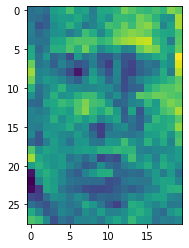

epoch 50100: loss = 817.4551
epoch 50200: loss = 1002.944
epoch 50300: loss = 894.2336
epoch 50400: loss = 830.84735
epoch 50500: loss = 818.29956
epoch 50600: loss = 889.17615
epoch 50700: loss = 774.4259
epoch 50800: loss = 904.7425
epoch 50900: loss = 838.7005
epoch 51000: loss = 823.3867


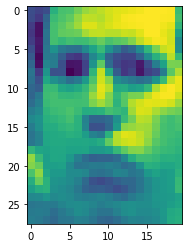

epoch 51100: loss = 895.443
epoch 51200: loss = 878.68146
epoch 51300: loss = 896.32776
epoch 51400: loss = 897.2423
epoch 51500: loss = 820.3973
epoch 51600: loss = 936.61426
epoch 51700: loss = 830.92596
epoch 51800: loss = 888.196
epoch 51900: loss = 783.10315
epoch 52000: loss = 793.90564


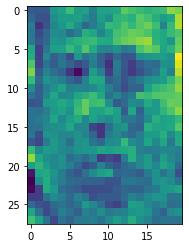

epoch 52100: loss = 903.80066
epoch 52200: loss = 961.13477
epoch 52300: loss = 826.5205
epoch 52400: loss = 931.0368
epoch 52500: loss = 885.641
epoch 52600: loss = 825.8312
epoch 52700: loss = 841.8633
epoch 52800: loss = 930.9217
epoch 52900: loss = 871.0747
epoch 53000: loss = 840.77625


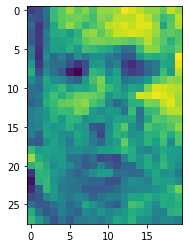

epoch 53100: loss = 864.76355
epoch 53200: loss = 820.1959
epoch 53300: loss = 900.94275
epoch 53400: loss = 880.5998
epoch 53500: loss = 872.5915
epoch 53600: loss = 915.76843
epoch 53700: loss = 819.29236
epoch 53800: loss = 915.5499
epoch 53900: loss = 834.75085
epoch 54000: loss = 984.651


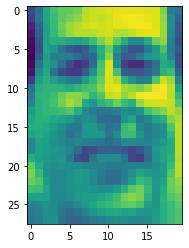

epoch 54100: loss = 823.52606
epoch 54200: loss = 895.0407
epoch 54300: loss = 890.284
epoch 54400: loss = 908.1862
epoch 54500: loss = 830.68713
epoch 54600: loss = 970.4824
epoch 54700: loss = 879.105
epoch 54800: loss = 859.18195
epoch 54900: loss = 839.2988
epoch 55000: loss = 957.2461


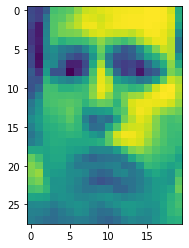

epoch 55100: loss = 913.0648
epoch 55200: loss = 990.09735
epoch 55300: loss = 811.8251
epoch 55400: loss = 861.2062
epoch 55500: loss = 852.548
epoch 55600: loss = 839.9916
epoch 55700: loss = 867.21545
epoch 55800: loss = 839.49054
epoch 55900: loss = 931.33185
epoch 56000: loss = 864.5519


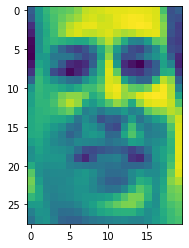

epoch 56100: loss = 872.43475
epoch 56200: loss = 856.6919
epoch 56300: loss = 861.61017
epoch 56400: loss = 770.42126
epoch 56500: loss = 811.2464
epoch 56600: loss = 763.9013
epoch 56700: loss = 835.6322
epoch 56800: loss = 886.05975
epoch 56900: loss = 950.10254
epoch 57000: loss = 813.01917


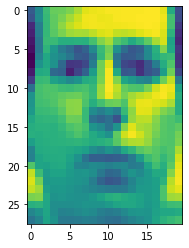

epoch 57100: loss = 1008.40283
epoch 57200: loss = 817.0489
epoch 57300: loss = 893.00665
epoch 57400: loss = 990.853
epoch 57500: loss = 919.5666
epoch 57600: loss = 887.51483
epoch 57700: loss = 934.912
epoch 57800: loss = 823.2111
epoch 57900: loss = 879.33167
epoch 58000: loss = 954.64764


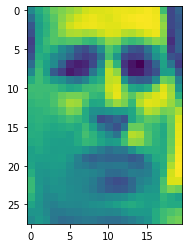

epoch 58100: loss = 942.5553
epoch 58200: loss = 903.74524
epoch 58300: loss = 816.0553
epoch 58400: loss = 967.72986
epoch 58500: loss = 851.7306
epoch 58600: loss = 977.7838
epoch 58700: loss = 846.8872
epoch 58800: loss = 845.77405
epoch 58900: loss = 943.8236
epoch 59000: loss = 753.3016


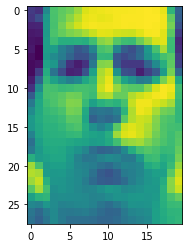

epoch 59100: loss = 904.6751
epoch 59200: loss = 885.19696
epoch 59300: loss = 829.92645
epoch 59400: loss = 874.1761
epoch 59500: loss = 930.7326
epoch 59600: loss = 891.2516
epoch 59700: loss = 930.62286
epoch 59800: loss = 864.8063
epoch 59900: loss = 904.9528
epoch 60000: loss = 801.8931


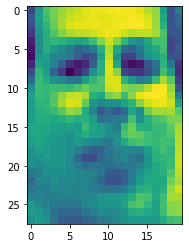

epoch 60100: loss = 743.9984
epoch 60200: loss = 795.09235
epoch 60300: loss = 736.6122
epoch 60400: loss = 782.3985
epoch 60500: loss = 947.58606
epoch 60600: loss = 871.2824
epoch 60700: loss = 941.91785
epoch 60800: loss = 979.7459
epoch 60900: loss = 913.4259
epoch 61000: loss = 920.07263


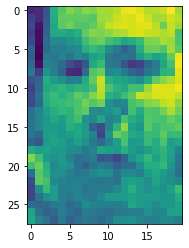

epoch 61100: loss = 949.0257
epoch 61200: loss = 880.1537
epoch 61300: loss = 902.8449
epoch 61400: loss = 1045.1658
epoch 61500: loss = 975.8954
epoch 61600: loss = 811.9924
epoch 61700: loss = 862.46124
epoch 61800: loss = 948.2497
epoch 61900: loss = 880.63837
epoch 62000: loss = 844.6525


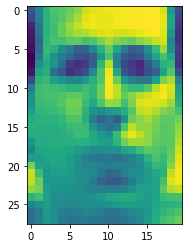

epoch 62100: loss = 915.0887
epoch 62200: loss = 859.37384
epoch 62300: loss = 958.31024
epoch 62400: loss = 933.5845
epoch 62500: loss = 751.99304
epoch 62600: loss = 905.3164
epoch 62700: loss = 927.0535
epoch 62800: loss = 967.0132
epoch 62900: loss = 970.2593
epoch 63000: loss = 895.1478


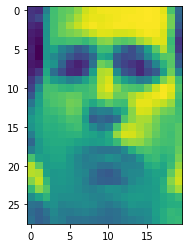

epoch 63100: loss = 983.87854
epoch 63200: loss = 831.6957
epoch 63300: loss = 837.8711
epoch 63400: loss = 955.0763
epoch 63500: loss = 946.7215
epoch 63600: loss = 944.0155
epoch 63700: loss = 905.23584
epoch 63800: loss = 850.3874
epoch 63900: loss = 942.229
epoch 64000: loss = 918.1219


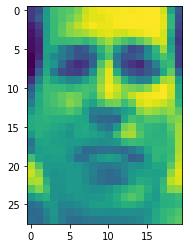

epoch 64100: loss = 1017.541
epoch 64200: loss = 905.8156
epoch 64300: loss = 907.7626
epoch 64400: loss = 940.3263
epoch 64500: loss = 844.8314
epoch 64600: loss = 887.9494
epoch 64700: loss = 856.2028
epoch 64800: loss = 927.9365
epoch 64900: loss = 887.6077
epoch 65000: loss = 820.241


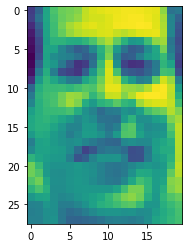

epoch 65100: loss = 832.4762
epoch 65200: loss = 937.81445
epoch 65300: loss = 1011.4253
epoch 65400: loss = 859.87
epoch 65500: loss = 1013.45056
epoch 65600: loss = 896.10754
epoch 65700: loss = 926.105
epoch 65800: loss = 983.1141
epoch 65900: loss = 899.4753
epoch 66000: loss = 989.42004


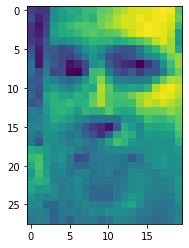

epoch 66100: loss = 860.87683
epoch 66200: loss = 919.64294
epoch 66300: loss = 881.33435
epoch 66400: loss = 898.0212
epoch 66500: loss = 767.5052
epoch 66600: loss = 857.9364
epoch 66700: loss = 1011.6914
epoch 66800: loss = 796.0547
epoch 66900: loss = 788.7585
epoch 67000: loss = 794.41943


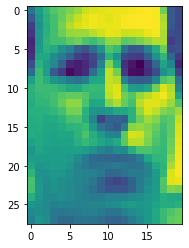

epoch 67100: loss = 911.479
epoch 67200: loss = 995.501
epoch 67300: loss = 871.96484
epoch 67400: loss = 955.8966
epoch 67500: loss = 926.34503
epoch 67600: loss = 971.7344
epoch 67700: loss = 958.1095
epoch 67800: loss = 752.62585
epoch 67900: loss = 826.05194
epoch 68000: loss = 986.62756


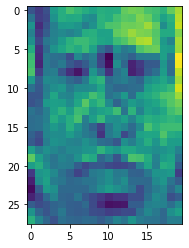

epoch 68100: loss = 870.4956
epoch 68200: loss = 845.4155
epoch 68300: loss = 849.147
epoch 68400: loss = 865.8926
epoch 68500: loss = 943.37695
epoch 68600: loss = 891.83234
epoch 68700: loss = 939.94055
epoch 68800: loss = 945.1053
epoch 68900: loss = 947.94794
epoch 69000: loss = 854.8387


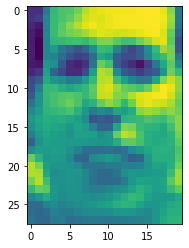

epoch 69100: loss = 959.174
epoch 69200: loss = 955.9754
epoch 69300: loss = 770.3487
epoch 69400: loss = 981.5482
epoch 69500: loss = 853.7666
epoch 69600: loss = 854.50183
epoch 69700: loss = 891.4064
epoch 69800: loss = 954.7676
epoch 69900: loss = 897.60956
epoch 70000: loss = 839.97754


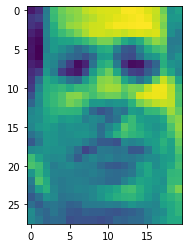

epoch 70100: loss = 953.65344
epoch 70200: loss = 837.5581
epoch 70300: loss = 919.9245
epoch 70400: loss = 893.0006
epoch 70500: loss = 900.66394
epoch 70600: loss = 929.4247
epoch 70700: loss = 790.51495
epoch 70800: loss = 882.03906
epoch 70900: loss = 910.98584
epoch 71000: loss = 877.1636


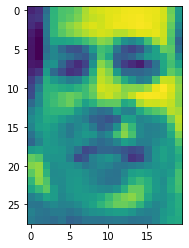

epoch 71100: loss = 949.0947
epoch 71200: loss = 911.30237
epoch 71300: loss = 1005.6574
epoch 71400: loss = 905.4824
epoch 71500: loss = 958.01025
epoch 71600: loss = 872.256
epoch 71700: loss = 849.401
epoch 71800: loss = 906.2492
epoch 71900: loss = 1085.6571
epoch 72000: loss = 911.39386


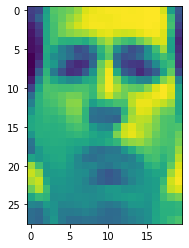

epoch 72100: loss = 934.0802
epoch 72200: loss = 891.21954
epoch 72300: loss = 839.0949
epoch 72400: loss = 964.1422
epoch 72500: loss = 961.4121
epoch 72600: loss = 879.54236
epoch 72700: loss = 827.6878
epoch 72800: loss = 869.92224
epoch 72900: loss = 817.8213
epoch 73000: loss = 830.38104


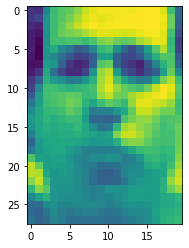

epoch 73100: loss = 893.07825
epoch 73200: loss = 839.47784
epoch 73300: loss = 914.52765
epoch 73400: loss = 950.3076
epoch 73500: loss = 849.3556
epoch 73600: loss = 979.07666
epoch 73700: loss = 947.0659
epoch 73800: loss = 915.4253
epoch 73900: loss = 961.14636
epoch 74000: loss = 979.90686


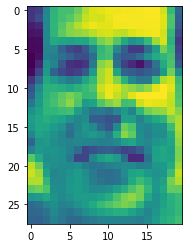

epoch 74100: loss = 780.7592
epoch 74200: loss = 829.97363
epoch 74300: loss = 963.5549
epoch 74400: loss = 936.46893
epoch 74500: loss = 796.1737
epoch 74600: loss = 937.14343
epoch 74700: loss = 998.3428
epoch 74800: loss = 804.5852
epoch 74900: loss = 1040.67
epoch 75000: loss = 872.5123


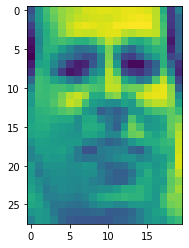

epoch 75100: loss = 1008.33887
epoch 75200: loss = 890.4744
epoch 75300: loss = 967.2628
epoch 75400: loss = 1007.0957
epoch 75500: loss = 896.4738
epoch 75600: loss = 874.0737
epoch 75700: loss = 959.4352
epoch 75800: loss = 928.7201
epoch 75900: loss = 960.4923
epoch 76000: loss = 835.84393


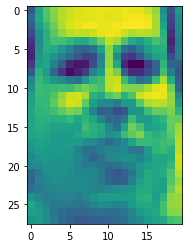

epoch 76100: loss = 1051.1731
epoch 76200: loss = 945.06104
epoch 76300: loss = 954.5209
epoch 76400: loss = 804.33954
epoch 76500: loss = 828.785
epoch 76600: loss = 911.18945
epoch 76700: loss = 979.0168
epoch 76800: loss = 924.0763
epoch 76900: loss = 937.0423
epoch 77000: loss = 853.67224


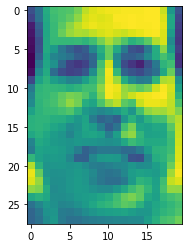

epoch 77100: loss = 957.80096
epoch 77200: loss = 1059.6057
epoch 77300: loss = 982.1911
epoch 77400: loss = 928.0275
epoch 77500: loss = 815.9242
epoch 77600: loss = 892.381
epoch 77700: loss = 893.9945
epoch 77800: loss = 769.23706
epoch 77900: loss = 909.7993
epoch 78000: loss = 903.2612


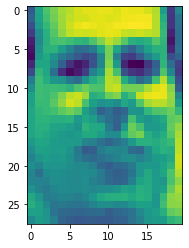

epoch 78100: loss = 872.5082
epoch 78200: loss = 910.86096
epoch 78300: loss = 995.56903
epoch 78400: loss = 1005.05457
epoch 78500: loss = 877.8563
epoch 78600: loss = 910.77313
epoch 78700: loss = 892.86804
epoch 78800: loss = 886.66833
epoch 78900: loss = 934.5477
epoch 79000: loss = 884.0421


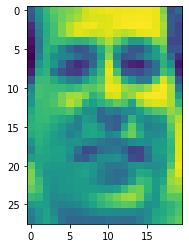

epoch 79100: loss = 916.6873
epoch 79200: loss = 977.9092
epoch 79300: loss = 899.56085
epoch 79400: loss = 938.0176
epoch 79500: loss = 996.5956
epoch 79600: loss = 776.2799
epoch 79700: loss = 915.0659
epoch 79800: loss = 824.8213
epoch 79900: loss = 872.8459
epoch 80000: loss = 944.619


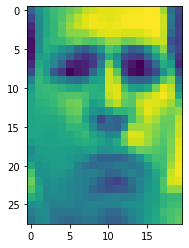

epoch 80100: loss = 805.201
epoch 80200: loss = 999.93896
epoch 80300: loss = 860.6535
epoch 80400: loss = 982.99005
epoch 80500: loss = 1036.7153
epoch 80600: loss = 997.93146
epoch 80700: loss = 960.9689
epoch 80800: loss = 963.47833
epoch 80900: loss = 905.8929
epoch 81000: loss = 855.9476


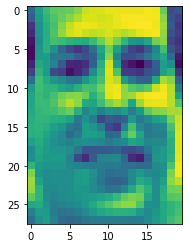

epoch 81100: loss = 863.0413
epoch 81200: loss = 882.26935
epoch 81300: loss = 972.41907
epoch 81400: loss = 896.65393
epoch 81500: loss = 1006.2223
epoch 81600: loss = 1017.40594
epoch 81700: loss = 790.8815
epoch 81800: loss = 857.76794
epoch 81900: loss = 945.8662
epoch 82000: loss = 901.9337


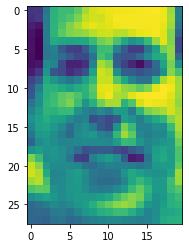

epoch 82100: loss = 918.1995
epoch 82200: loss = 850.1077
epoch 82300: loss = 834.86914
epoch 82400: loss = 923.16736
epoch 82500: loss = 894.4933
epoch 82600: loss = 919.3537
epoch 82700: loss = 1020.82117
epoch 82800: loss = 875.73865
epoch 82900: loss = 940.44934
epoch 83000: loss = 1056.3525


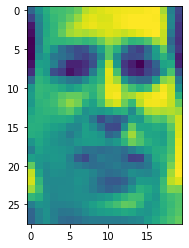

epoch 83100: loss = 936.14075
epoch 83200: loss = 1001.94055
epoch 83300: loss = 870.6037
epoch 83400: loss = 970.4269
epoch 83500: loss = 913.06555
epoch 83600: loss = 890.04395
epoch 83700: loss = 940.7093
epoch 83800: loss = 909.09827
epoch 83900: loss = 961.38934
epoch 84000: loss = 898.6832


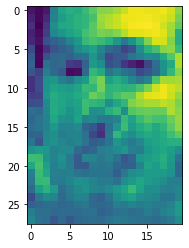

epoch 84100: loss = 937.7624
epoch 84200: loss = 947.0659
epoch 84300: loss = 752.6156
epoch 84400: loss = 976.74524
epoch 84500: loss = 935.8114
epoch 84600: loss = 860.2167
epoch 84700: loss = 966.6963
epoch 84800: loss = 878.87024
epoch 84900: loss = 939.02277
epoch 85000: loss = 877.4368


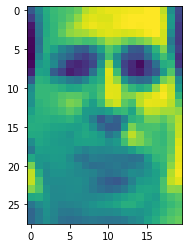

epoch 85100: loss = 852.18713
epoch 85200: loss = 980.9764
epoch 85300: loss = 857.68896
epoch 85400: loss = 849.1595
epoch 85500: loss = 904.81396
epoch 85600: loss = 942.40546
epoch 85700: loss = 887.8459
epoch 85800: loss = 964.9295
epoch 85900: loss = 927.5182
epoch 86000: loss = 922.5299


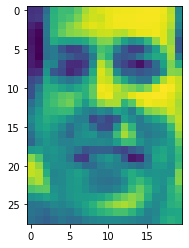

epoch 86100: loss = 916.0713
epoch 86200: loss = 887.42267
epoch 86300: loss = 944.6
epoch 86400: loss = 915.3412
epoch 86500: loss = 965.2212
epoch 86600: loss = 938.2733
epoch 86700: loss = 876.1074
epoch 86800: loss = 883.5545
epoch 86900: loss = 978.8999
epoch 87000: loss = 1045.3455


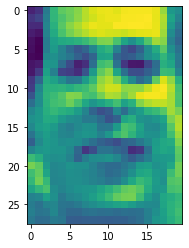

epoch 87100: loss = 1006.7213
epoch 87200: loss = 900.71515
epoch 87300: loss = 798.90173
epoch 87400: loss = 918.10724
epoch 87500: loss = 985.4955
epoch 87600: loss = 972.5249
epoch 87700: loss = 933.35156
epoch 87800: loss = 833.04504
epoch 87900: loss = 969.3573
epoch 88000: loss = 939.5124


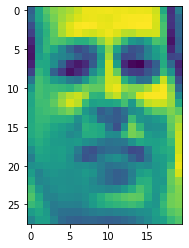

epoch 88100: loss = 829.84064
epoch 88200: loss = 919.7992
epoch 88300: loss = 944.0112
epoch 88400: loss = 873.6813
epoch 88500: loss = 1045.3726
epoch 88600: loss = 954.02136
epoch 88700: loss = 943.9557
epoch 88800: loss = 941.5377
epoch 88900: loss = 946.39795
epoch 89000: loss = 786.1081


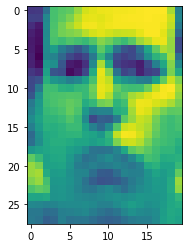

epoch 89100: loss = 851.33466
epoch 89200: loss = 832.12616
epoch 89300: loss = 857.47595
epoch 89400: loss = 951.3368
epoch 89500: loss = 958.984
epoch 89600: loss = 962.2121
epoch 89700: loss = 1046.471
epoch 89800: loss = 967.6823
epoch 89900: loss = 974.1488
epoch 90000: loss = 1033.3992


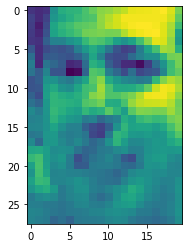

epoch 90100: loss = 931.5044
epoch 90200: loss = 804.93634
epoch 90300: loss = 854.2423
epoch 90400: loss = 986.9152
epoch 90500: loss = 983.784
epoch 90600: loss = 870.8916
epoch 90700: loss = 902.4041
epoch 90800: loss = 918.46545
epoch 90900: loss = 873.2829
epoch 91000: loss = 834.0615


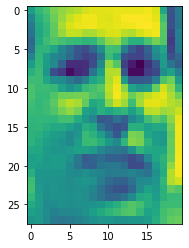

epoch 91100: loss = 927.9308
epoch 91200: loss = 1051.6584
epoch 91300: loss = 960.3844
epoch 91400: loss = 966.29443
epoch 91500: loss = 894.55
epoch 91600: loss = 906.68445
epoch 91700: loss = 778.1926
epoch 91800: loss = 924.5838
epoch 91900: loss = 1003.0552
epoch 92000: loss = 948.90344


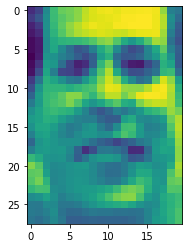

epoch 92100: loss = 1013.97424
epoch 92200: loss = 970.249
epoch 92300: loss = 904.61835
epoch 92400: loss = 984.8039
epoch 92500: loss = 897.78827
epoch 92600: loss = 982.46155
epoch 92700: loss = 946.9704
epoch 92800: loss = 884.3327
epoch 92900: loss = 887.8739
epoch 93000: loss = 979.9263


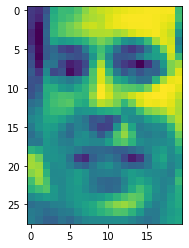

epoch 93100: loss = 923.7855
epoch 93200: loss = 911.61914
epoch 93300: loss = 1008.4909


In [ ]:
%load_ext autoreload
test_case_name='frey1'
test_case = tests.test_cases[test_case_name]
epochs = test_case['epochs']
batch_size = test_case['batch_size']
input_shape = test_case['input_shape']
x = test_case['dataset_loader'](input_shape, test_case.get('options'))
if test_case['model_class'] == mns.model_normal_simple:
    model = mns.model_normal_simple()
else:
    dim_z_hidden, dim_z, dim_x_hidden = test_case['model_dims']
    model = test_case['model_class'](
        dim_z_hidden=dim_z_hidden,
        dim_z=dim_z,
        input_shape=x.shape[1:],
        dim_x_hidden=dim_x_hidden)
optimizer = tf.keras.optimizers.Adamax()
options = test_case.get('options')
report_frequency=test_case.get('report_frequency',1)
# batch_size = len(x)
for epoch in range(epochs):
    loss_func = ec.elbo_calculator().get_loss_func()
    loss = train.train_one_random_batch(model, x, optimizer, loss_func, y=None, batch_size=batch_size, options=options)
    if ((epoch + 1) % report_frequency == 0):
        print('epoch %s: loss = %s' %(epoch+1, -loss.numpy()))
        if ((epoch + 1) % (report_frequency*10) == 0):
            model.encoder.save('%s_encoder.h5' % test_case_name)
            model.decoder.save('%s_decoder.h5' % test_case_name)
            z = np.random.normal(0,1,(1,dim_z))
            mu_x, log_sigma_x = model.decoder(z)
            img = np.reshape(mu_x.numpy(), (28,20))
            plt.imshow(img)
            plt.show()